In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Read csv files and Process the Dataset

We read the accelerometer reading of Smartphone 4, of the Subjects 125,126,127,128 and 129. Each subject had 3 normal and 3 impaired csv files for Smartphone 4 location. So total for 5 subjects 15 Normal and 15 Impaired csv files. 

For loop was used initially, however the processing time was more. Hence the files were read individually for Normal and Impaired csv files.

In [3]:
normal_1= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject125_normal01\Accelerometer.csv")
normal_2= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject125_normal02\Accelerometer.csv")
normal_3= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject125_normal03\Accelerometer.csv")
normal_4= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject126_normal01\Accelerometer.csv")
normal_5= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject126_normal02\Accelerometer.csv")
normal_6= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject126_normal03\Accelerometer.csv")
normal_7= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject127_normal01\Accelerometer.csv")
normal_8= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject127_normal02\Accelerometer.csv")
normal_9= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject127_normal03\Accelerometer.csv")
normal_10= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject128_normal01\Accelerometer.csv")
normal_11= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject128_normal02\Accelerometer.csv")
normal_12= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject128_normal03\Accelerometer.csv")
normal_13= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject129_normal01\Accelerometer.csv")
normal_14= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject129_normal02\Accelerometer.csv")
normal_15= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Normal\subject129_normal03\Accelerometer.csv")

normal_data = pd.concat([normal_1, normal_2, normal_3, normal_4, normal_5, normal_6, normal_7, normal_8, normal_9, normal_10, normal_11, normal_12, normal_13, normal_14, normal_15])

normal.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,0.086191,7.232883,13.012486
1,0.001984,2.207454,2.901772,15.387534
2,0.004028,4.228160,0.919373,15.540763
3,0.006012,5.008670,-2.619257,14.714764
4,0.007996,5.985504,-5.355829,12.109872


In [4]:
normal.shape

(163062, 4)

In [5]:
impaired_1= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject125_impaired01\Accelerometer.csv")
impaired_2= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject125_impaired02\Accelerometer.csv")
impaired_3= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject125_impaired03\Accelerometer.csv")
impaired_4= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject126_impaired01\Accelerometer.csv")
impaired_5= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject126_impaired02\Accelerometer.csv")
impaired_6= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject126_impaired03\Accelerometer.csv")
impaired_7= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject127_impaired01\Accelerometer.csv")
impaired_8= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject127_impaired02\Accelerometer.csv")
impaired_9= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject127_impaired03\Accelerometer.csv")
impaired_10= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject128_impaired01\Accelerometer.csv")
impaired_11= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject128_impaired02\Accelerometer.csv")
impaired_12= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject128_impaired03\Accelerometer.csv")
impaired_13= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject129_impaired01\Accelerometer.csv")
impaired_14= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject129_impaired02\Accelerometer.csv")
impaired_15= pd.read_csv(r"C:\Users\siddhanthshah\Desktop\Impaired\subject129_impaired03\Accelerometer.csv")

impaired_data = pd.concat([impaired_1, impaired_2, impaired_3, impaired_4, impaired_5, impaired_6, impaired_7, impaired_8, impaired_9, impaired_10, impaired_11, impaired_12, impaired_13, impaired_14, impaired_15])

impaired.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.000000,-1.865083,-2.406173,0.663194
1,0.002014,-1.838747,-2.499547,0.797269
2,0.003998,-1.795651,-2.705448,1.086968
3,0.005981,-1.781286,-2.956839,1.388637
4,0.007935,-1.728614,-3.107674,1.558625


In [6]:
impaired.shape

(162064, 4)

### Renaming of the Columns

Renaming the column names for our convenience. Also the operations on the columns can then be easily performed.

In [7]:
normal.columns
impaired.columns

Index(['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)'],
      dtype='object')

In [8]:
normal.rename(columns = {'Time (s)':'time', 'Acceleration x (m/s^2)':'x', 'Acceleration y (m/s^2)':'y', 'Acceleration z (m/s^2)':'z'}, inplace = True)
impaired.rename(columns = {'Time (s)':'time', 'Acceleration x (m/s^2)':'x', 'Acceleration y (m/s^2)':'y', 'Acceleration z (m/s^2)':'z'}, inplace = True)
normal.columns
impaired.columns

Index(['time', 'x', 'y', 'z'], dtype='object')

### Adding 'type' column

Adding the 'type' column to both the dataset with values 'normal' for the normal dataset and 'impaired' for the impaired dataset. This is done so that the labelling operation can be performed on the dataset assigning particular numerical values.

In [9]:
normal['type'] = "normal"
normal.head()

,time,x,y,z,type
0,0.000000,0.086191,7.232883,13.012486,normal
1,0.001984,2.207454,2.901772,15.387534,normal
2,0.004028,4.228160,0.919373,15.540763,normal
3,0.006012,5.008670,-2.619257,14.714764,normal
4,0.007996,5.985504,-5.355829,12.109872,normal


In [10]:
normal.shape

(163062, 5)

In [11]:
impaired['type'] = "impaired"
impaired.head()

,time,x,y,z,type
0,0.000000,-1.865083,-2.406173,0.663194,impaired
1,0.002014,-1.838747,-2.499547,0.797269,impaired
2,0.003998,-1.795651,-2.705448,1.086968,impaired
3,0.005981,-1.781286,-2.956839,1.388637,impaired
4,0.007935,-1.728614,-3.107674,1.558625,impaired


In [12]:
impaired.shape

(162064, 5)

### Concatenate both the datasets

Since we need to split the dataset in the further steps in a sample-wise or record-wise manner, we concatenate both the datasets containing both thr normal and impaired values for every subject.

In [13]:
data = pd.concat([normal, impaired])
data.shape

(325126, 5)

### Checking the data type of the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325126 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    325126 non-null  float64
 1   x       300984 non-null  float64
 2   y       300984 non-null  float64
 3   z       300984 non-null  float64
 4   type    325126 non-null  object 
dtypes: float64(4), object(1)
memory usage: 14.9+ MB


### Checking for null values and other noise

In [15]:
data.isnull().sum()

time        0
x       24142
y       24142
z       24142
type        0
dtype: int64

In [16]:
data[data.x.isnull()]

,time,x,y,z,type
0,0.000000,NaN,NaN,NaN,normal
1,0.009979,NaN,NaN,NaN,normal
2,0.019928,NaN,NaN,NaN,normal
3,0.029907,NaN,NaN,NaN,normal
4,0.039856,NaN,NaN,NaN,normal
...,...,...,...,...,...
4059,40.439680,NaN,NaN,NaN,impaired
4060,40.449659,NaN,NaN,NaN,impaired
4061,40.459608,NaN,NaN,NaN,impaired
4062,40.469587,NaN,NaN,NaN,impaired


### Dropping the rows that contain noise / Filtering noise

We drop the rows which contain noise or null values so that we get uniform and structured dataset.

In [17]:
data1 = data.dropna(how = "any")
data1.shape

(300984, 5)

In [18]:
sampling_rate = 1
types = data1['type'].value_counts().index
types

Index(['normal', 'impaired'], dtype='object')

### Extracting motion sequence

We plot both the datasets after removal of noise to check of any other descrepency is still there in the data.

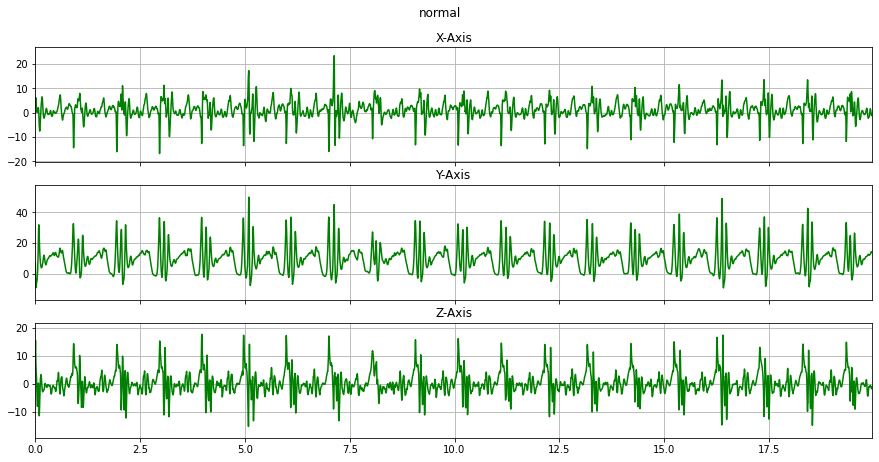

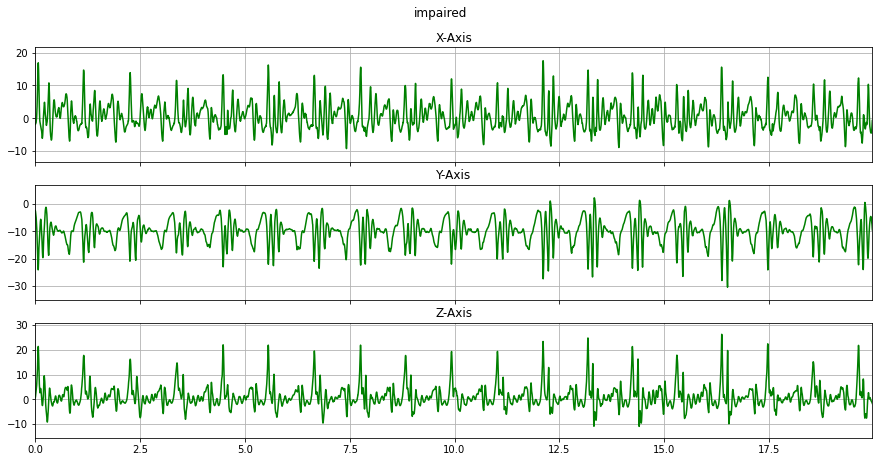

In [19]:
def plot_activity(type, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(type)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(True)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for type in types:
    data_for_plot = data[(data['type'] == type)][:sampling_rate*10000]
    plot_activity(type, data_for_plot)

In [20]:
data1['type'].value_counts()

normal      151102
impaired    149882
Name: type, dtype: int64

### Dropping the 'time' column to remove time dependency

We drop the 'time' column from the dataset so that we remove the time dependency of our data. 

In [21]:
df = data1.drop(['time'], axis = 1).copy()
df.head()

,x,y,z,type
0,0.086191,7.232883,13.012486,normal
1,2.207454,2.901772,15.387534,normal
2,4.228160,0.919373,15.540763,normal
3,5.008670,-2.619257,14.714764,normal
4,5.985504,-5.355829,12.109872,normal


### Balancing of the dataset

We take equal number of datapoints from both the datasets so that we can have equal number of datapoints for the processing. If we use this data directly then there is a possibility of Overfitting.

In [22]:
impaired1 = df[df['type'] == 'impaired'].head(149882).copy()
normal1 = df[df['type'] == 'normal'].head(149882).copy()

In [23]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([impaired1, normal1])
balanced_data.shape

(299764, 4)

In [24]:
balanced_data['type'].value_counts()

impaired    149882
normal      149882
Name: type, dtype: int64

### Labelling the dataset

We label the dataset. For impaired values 0 is assigned and for normal values 1 is assigned. This helps in removing the dependency of the model from 'string' datatype to purely numerical datatype. As we can see, the values in 'type' are of data type string. We will convert them into numeric values using LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['type'])
balanced_data.head()

,x,y,z,type,label
0,-1.865083,-2.406173,0.663194,impaired,0
1,-1.838747,-2.499547,0.797269,impaired,0
2,-1.795651,-2.705448,1.086968,impaired,0
3,-1.781286,-2.956839,1.388637,impaired,0
4,-1.728614,-3.107674,1.558625,impaired,0


In [27]:
label.classes_

array(['impaired', 'normal'], dtype=object)

### Standardization of Data and Principal Component Analysis

We standardize our dataset using the Standard Scaler function. We use the scaled data for our Principal Component Analysis (PCA) or the rotation of the data. We use PCA for reducing the dimensionality of our dataset and increasing the interpretability but at the same time minimizing information loss.

In [28]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [29]:
df1 = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
df1['label'] = y.values

scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [30]:
scaled_data = scaler.transform(df1)

In [31]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components = 2)

In [70]:
x_pca = pca.fit_transform(scaled_data)

In [71]:
scaled_data.shape

(299764, 4)

In [72]:
x_pca.shape

(299764, 2)

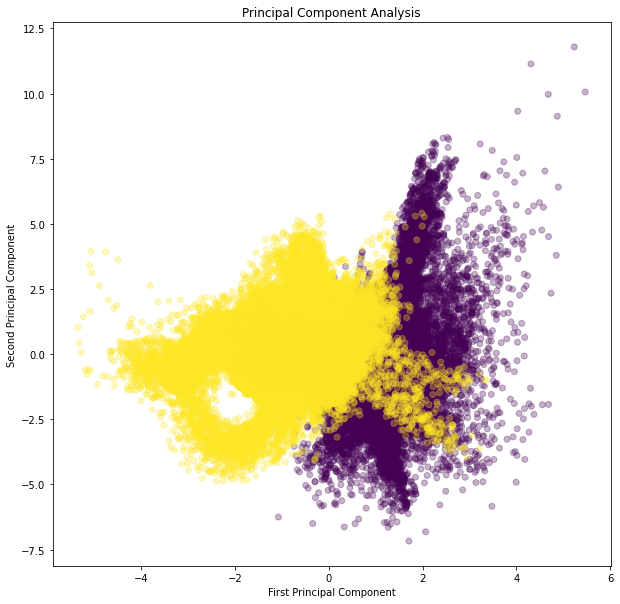

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0], x_pca[:,1], c = balanced_data['label'], cmap = 'viridis', alpha = 0.3)
plt.title('Principal Component Analysis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

plt.savefig('PCA.png')

### Frame Preparation

We consider 40 observations at a time and a hop size of 20. Since we have 149882 observations in each dataset, i.e total 299764 observations. This divided by the hop size gives us the number of frames in the dataset i.e approximately 14987.

In [38]:
import scipy.stats as stats

In [39]:
sampling_rate = 1
frame_size = sampling_rate * 40 
hop_size = sampling_rate * 20

In [40]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(df1, frame_size, hop_size)

X.shape, y.shape

((14987, 40, 3), (14987,))

### Splitting the dataset

Here we divide the data into training data and test data using test_train_split()/ We rae going to use 80% of our data for training the model and 20% of the data for testing. We can see that we have got 11989 samples in training dataset and 2998 samples in test dataset.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [42]:
X_train.shape, X_test.shape

((11989, 40, 3), (2998, 40, 3))

In [43]:
X_train[0].shape, X_test[0].shape

((40, 3), (40, 3))

### Reshaping the data

Our entire data is 3-Dimensional but each sample in the data is 2-Dimensional. The Neural Network Model accepts the data in 3-Dimensions. Hence we are going to reshape our data.

In [44]:
X_train = X_train.reshape(11989, 40, 3, 1)
X_test = X_test.reshape(2998, 40, 3, 1)

In [45]:
X_train[0].shape, X_test[0].shape

((40, 3, 1), (40, 3, 1))

### K-Fold Cross Validation Model using Neural Networks. 

We use K-Fold Cross Validation model for 10 splits i.e for each split, the same model is trained, and performance is displayed per fold. In our scenario we train the model 10 times.

In [46]:
from sklearn.model_selection import KFold

In [47]:
num_folds = 10

#Normalize the data
#X_train = X_train / 255
#y_test = y_test / 255

#Define per-fold score conatiners
accuracy_per_fold = []
loss_per_fold = []

In [48]:
# Merge train and tests
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [49]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [50]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape = X_train[0].shape))
  model.add(Dropout(0.1))
  
  model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
  model.add(Dropout(0.2))

  model.add(Flatten())
    
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  #model.add(Dense(128, activation='relu'))
  model.add(Dense(6, activation='softmax'))

  # Compile the model
  model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train], batch_size=50, epochs=25, verbose=1)
 
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
270/270 [==============================] - 1s 4ms/step - loss: 0.7017 - accuracy: 0.6172
Epoch 2/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6212 - accuracy: 0.6414
Epoch 3/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6083 - accuracy: 0.6518
Epoch 4/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6004 - accuracy: 0.6592
Epoch 5/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5913 - accuracy: 0.6610
Epoch 6/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5833 - accuracy: 0.6751
Epoch 7/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5719 - accuracy: 0.6802
Epoch 8/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5670 - accuracy: 0.6819
Epoch 9/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5565 - accuracy: 0.6858
Epo

270/270 [==============================] - 1s 4ms/step - loss: 0.6970 - accuracy: 0.6187
Epoch 2/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6286 - accuracy: 0.6395
Epoch 3/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6107 - accuracy: 0.6421
Epoch 4/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6029 - accuracy: 0.6546
Epoch 5/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5969 - accuracy: 0.6584
Epoch 6/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5848 - accuracy: 0.6682
Epoch 7/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5758 - accuracy: 0.6773
Epoch 8/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5674 - accuracy: 0.6874
Epoch 9/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5583 - accuracy: 0.6916
Epoch 10/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5484 - accuracy: 0.6991
Epoch 11/2

270/270 [==============================] - 1s 4ms/step - loss: 0.6153 - accuracy: 0.6485
Epoch 4/25
270/270 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.6530
Epoch 5/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5989 - accuracy: 0.6613
Epoch 6/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5933 - accuracy: 0.6649
Epoch 7/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5852 - accuracy: 0.6720
Epoch 8/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5794 - accuracy: 0.6730
Epoch 9/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5750 - accuracy: 0.6787
Epoch 10/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5669 - accuracy: 0.6872
Epoch 11/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5609 - accuracy: 0.6860
Epoch 12/25
270/270 [==============================] - 1s 4ms/step - loss: 0.5548 - accuracy: 0.6940
Epoch 13

In [51]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(accuracy_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {accuracy_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4392538070678711 - Accuracy: 77.98532247543335%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.4532725214958191 - Accuracy: 77.58505940437317%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.4409685432910919 - Accuracy: 77.98532247543335%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.44204363226890564 - Accuracy: 77.0513653755188%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.42267119884490967 - Accuracy: 79.11941409111023%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.4580092430114746 - Accuracy: 76.71781182289124%
-----------------------------------------------------------------------

### Plotting Fold-wise and 2, 5, 10 fold accuracy and loss

In [52]:
accuracy1 = [accuracy_per_fold[1], accuracy_per_fold[4], accuracy_per_fold[9]]
loss1 = [loss_per_fold[1], loss_per_fold[4], loss_per_fold[9]]
folds = [2, 5, 10]
fold = range(1,11)

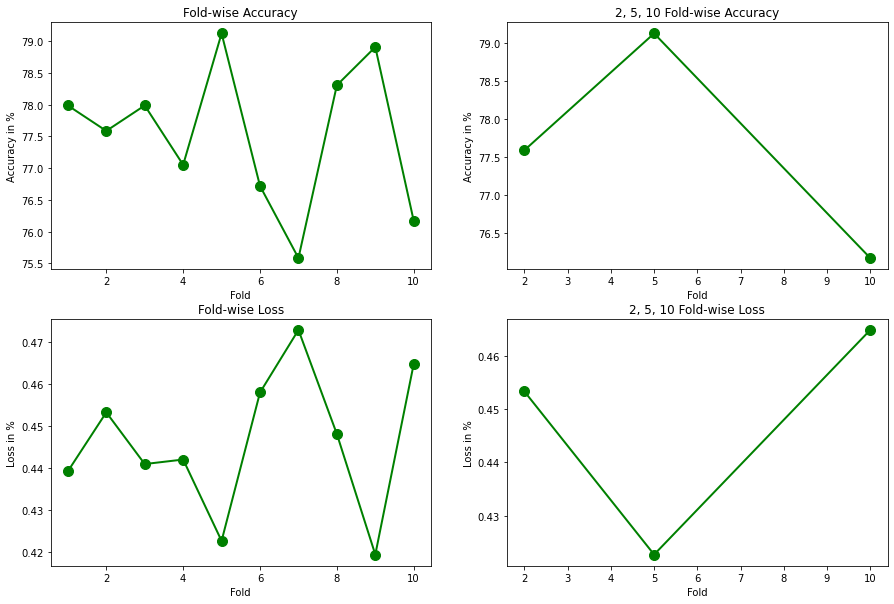

In [53]:
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(2,2,1)
plt.plot(fold, accuracy_per_fold, color='green', marker='o', linewidth=2, markersize=10)
plt.title('Fold-wise Accuracy')
plt.ylabel('Accuracy in %')
plt.xlabel('Fold')

ax2 = plt.subplot(2,2,2)
plt.plot(folds, accuracy1, color='green', marker='o', linewidth=2, markersize=10)
plt.title('2, 5, 10 Fold-wise Accuracy')
plt.ylabel('Accuracy in %')
plt.xlabel('Fold')

ax3 = plt.subplot(2,2,3)
plt.plot(fold, loss_per_fold, color='green', marker='o', linewidth=2, markersize=10)
plt.title('Fold-wise Loss')
plt.ylabel('Loss in %')
plt.xlabel('Fold')

ax4 = plt.subplot(2,2,4)
plt.plot(folds, loss1, color='green', marker='o', linewidth=2, markersize=10)
plt.title('2, 5, 10 Fold-wise Loss')
plt.ylabel('Loss in %')
plt.xlabel('Fold')

plt.savefig('Fold-Loss.png')

### Plotting the error fold-wise and 2, 5, 10 fold

In [54]:
error = []
for i in range(0, len(accuracy_per_fold)):
    x = 100 - accuracy_per_fold[i]
    error.append(x)

In [55]:
error1 = []
x2 = 100 - accuracy_per_fold[1]
x5 = 100 - accuracy_per_fold[4]
x10 = 100 - accuracy_per_fold[9]
error1.append(x2)
error1.append(x5)
error1.append(x10)

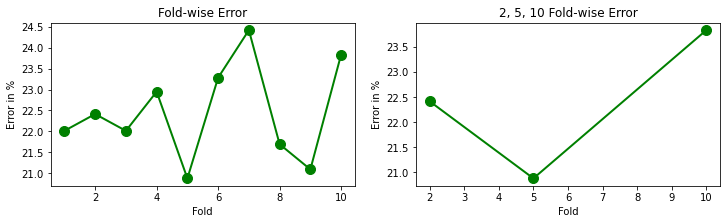

In [56]:
folds = [2, 5, 10]
plt.figure(figsize = (12, 3))
ax1 = plt.subplot(1,2,1)
plt.plot(fold, error, color='green', marker='o', linewidth=2, markersize=10)
plt.title('Fold-wise Error')
plt.ylabel('Error in %')
plt.xlabel('Fold')

ax2 = plt.subplot(1,2,2)
plt.plot(folds, error1, color='green', marker='o', linewidth=2, markersize=10)
plt.title('2, 5, 10 Fold-wise Error')
plt.ylabel('Error in %')
plt.xlabel('Fold')

plt.savefig('Error.png')

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on test dataset for which the true values are known. As we can see, our model can predict the normal walk of a person with 85% accuracy and impaired walk of a person with 77% accuracy.

In [57]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [58]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


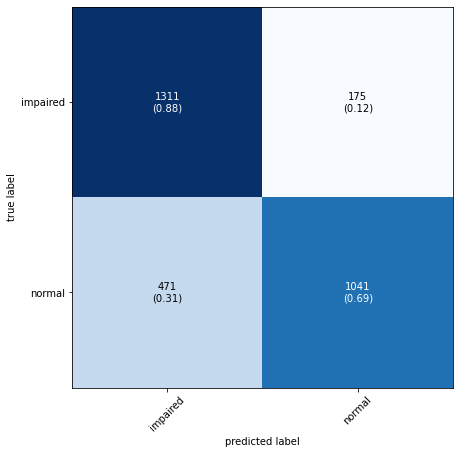

In [59]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, class_names = label.classes_, show_normed = True, figsize = (7, 7))

plt.savefig('confusion_matrix.png')

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Metrics Analysis of the data

In [61]:
# summarize the first 150 cases
for i in range(150):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[[[-2.1540784840000002], [-2.242712021], [-2.3936285969999997]], [[-2.585268497], [-2.8607509139999996], [-3.0356225969999997]], [[-3.155397415], [-3.272777081], [-3.4069249630000003]], [[-3.52670002], [-3.569818974], [-3.682407618]], [[-3.691989422], [-3.68959403], [-3.7470860480000003]], [[-3.821346521], [-3.854883432], [-3.886024952]], [[-3.902793407], [-3.9339349269999997], [-3.962681055]], [[-3.953099012], [-3.9339349269999997], [-3.893211603]], [[-3.835719585], [-3.727921963], [-3.59377408]], [[-3.485976458], [-3.404529572], [-3.282358885]], [[-3.181747913], [-3.088323593], [-3.081136942]], [[-3.0691595080000003], [-3.088323593], [-2.9829216]], [[-2.81763196], [-2.6164100169999998], [-2.489448547]], [[-2.355300426], [2.052644014], [2.1029493809999997]], [[2.122113466], [2.16523242], [2.2299110890000002]], [[2.299380541], [2.431133032], [2.526952982]], [[2.663496494], [2.816808462], [2.9485609530000003]], [[3.061149597], [3.1449921130000003], [3.233625412]], [[3.310281515], [3.403

In [62]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:' ,accuracy*100)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f', precision*100)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f', recall*100)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f',f1)
 # kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f', kappa)
# ROC AUC
auc_1 = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f', auc_1)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix' , matrix)
# MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)
#RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)

Accuracy: 78.45230153435624
Precision: %f 85.60855263157895
Recall: %f 68.84920634920636
F1 score: %f 0.7631964809384164
Cohens kappa: %f 0.5697504754118756
ROC AUC: %f 0.7853631246127881
Confusion Matrix [[1311  175]
 [ 471 1041]]
Mean Absolute Error 0.21547698465643764
Root Mean Squared Error 0.464194985600273


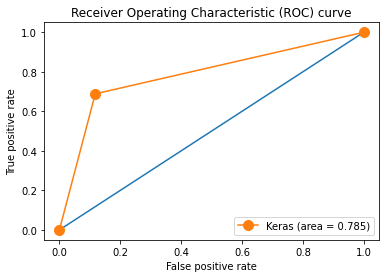

In [63]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras), marker='o', markersize=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()